In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# Descriptive Statistics
print(customers.describe())
print(products.describe())
print(transactions.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [4]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [5]:
def print_dataset_info(df, name):
    print(f"\n{name} Dataset Info:")
    print(f"Shape: {df.shape}")
    print("\nSample Data:")
    print(df.head())
    print("\nData Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())

# Perform basic EDA
print_dataset_info(customers, "Customers")
print_dataset_info(products, "Products")
print_dataset_info(transactions, "Transactions")


Customers Dataset Info:
Shape: (200, 4)

Sample Data:
  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15

Data Types:
CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object

Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products Dataset Info:
Shape: (100, 4)

Sample Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   

In [6]:
# Remove duplicates
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

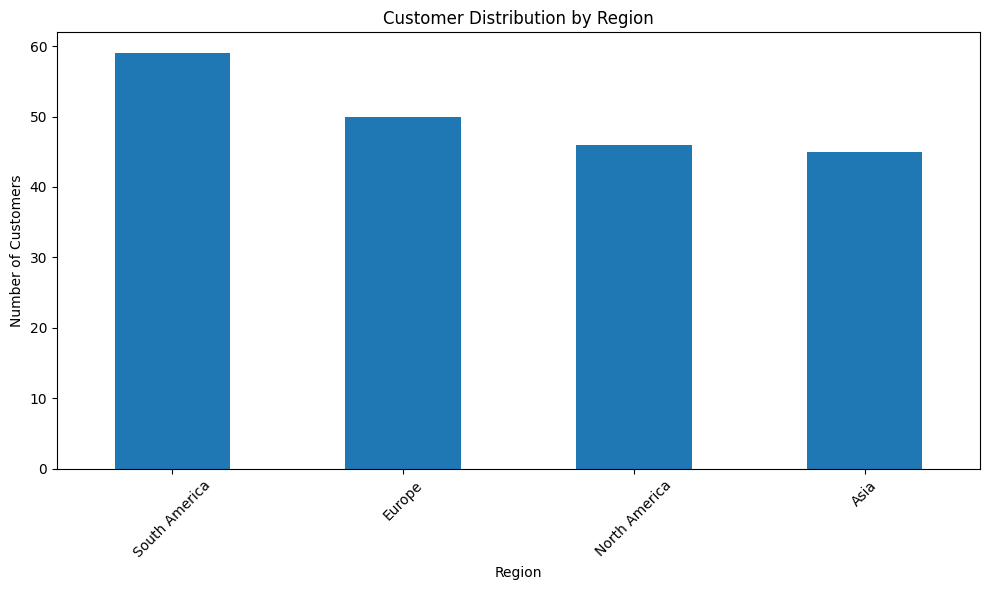

In [7]:
#Regional Customer Distribution
regional_dist = customers['Region'].value_counts()
plt.figure(figsize=(10, 6))
regional_dist.plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
#Product Category Analysis
category_stats = products.groupby('Category').agg({
    'Price': ['mean', 'min', 'max', 'count']
}).round(2)
print("\nProduct Category Statistics:")
print(category_stats)


Product Category Statistics:
              Price                     
               mean    min     max count
Category                                
Books        292.21  33.59  497.76    26
Clothing     263.72  18.82  481.78    25
Electronics  275.35  16.08  459.86    26
Home Decor   235.02  41.18  454.53    23


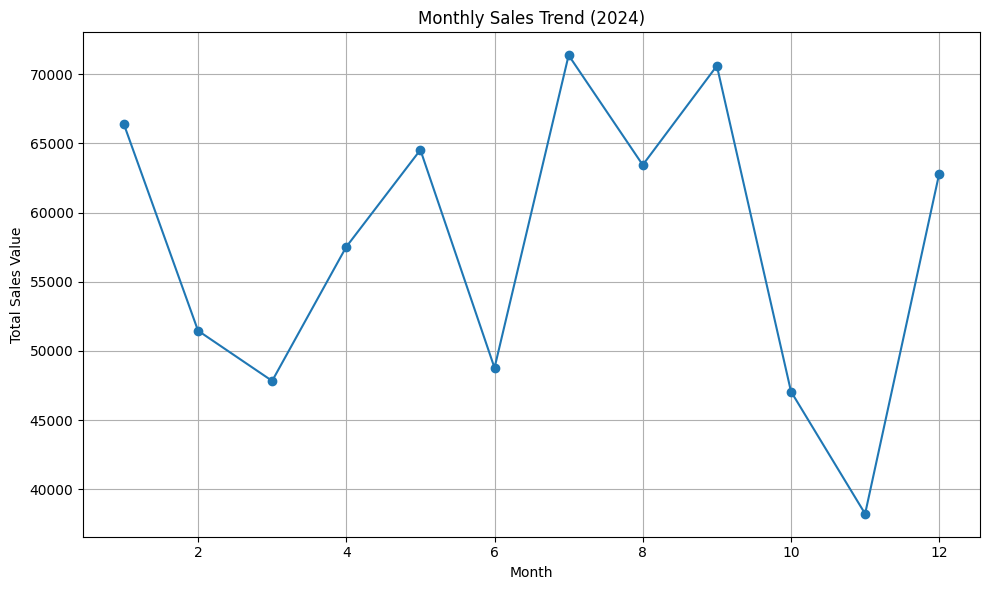

In [9]:
#Sales Analysis
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_sales = transactions.groupby('Month')['TotalValue'].sum().round(2)
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend (2024)')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.grid(True)
plt.tight_layout()
plt.show()

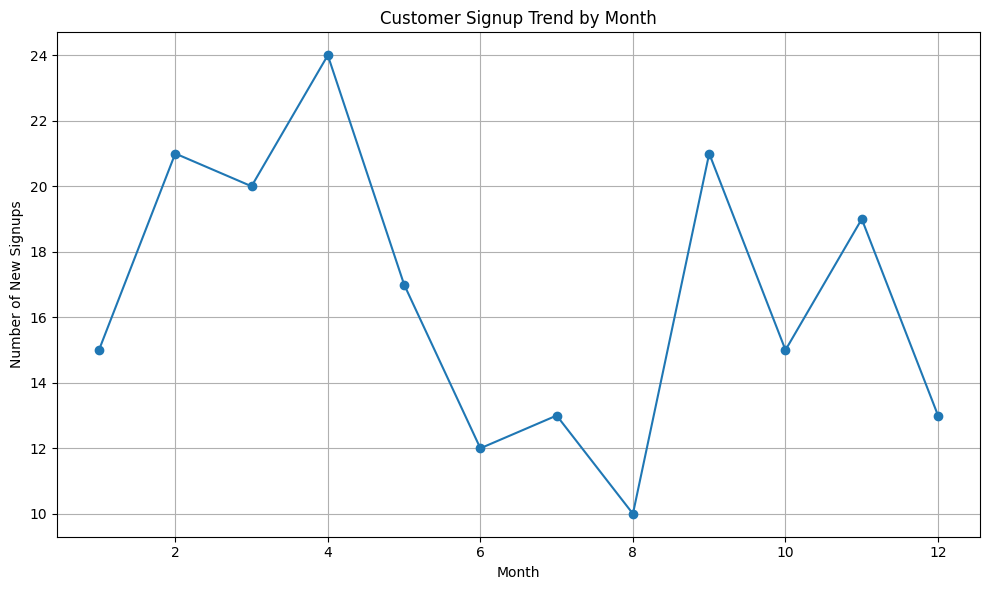

In [10]:
#Customer Signup Trend
customers['SignupMonth'] = customers['SignupDate'].dt.month
signup_trend = customers.groupby('SignupMonth').size()
plt.figure(figsize=(10, 6))
signup_trend.plot(kind='line', marker='o')
plt.title('Customer Signup Trend by Month')
plt.xlabel('Month')
plt.ylabel('Number of New Signups')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
#Top Products Analysis
product_sales = transactions.groupby('ProductID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).round(2)
top_products = product_sales.sort_values('TotalValue', ascending=False).head(10)
print("\nTop 10 Products by Sales Value:")
print(top_products)


Top 10 Products by Sales Value:
           Quantity  TotalValue
ProductID                      
P029             45    19513.80
P079             43    17946.91
P048             43    17905.20
P020             38    15060.92
P062             39    14592.24
P059             46    13947.20
P039             32    13778.88
P083             30    13671.60
P019             35    13487.95
P041             29    13232.12


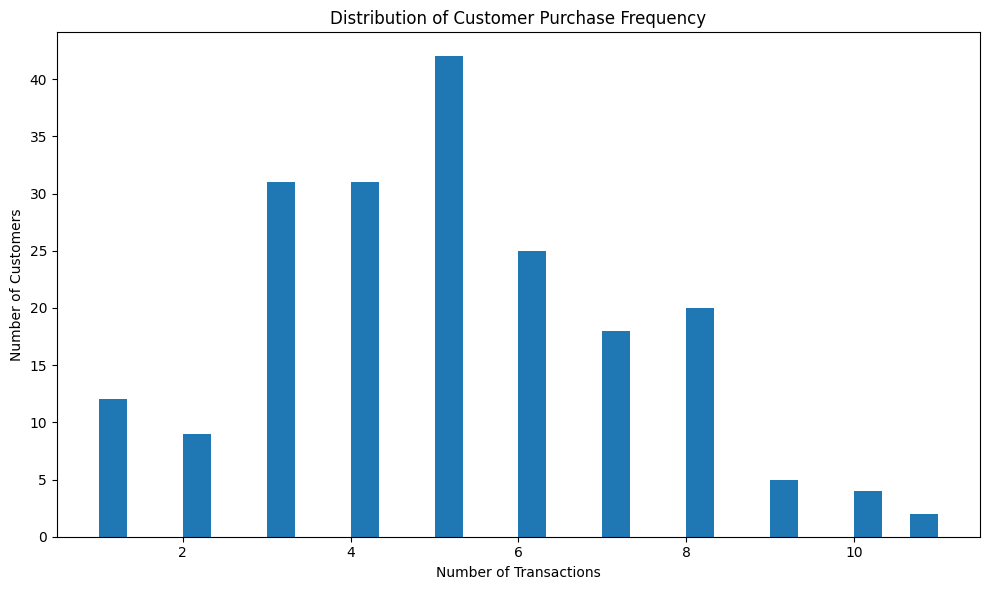

In [12]:
#Customer Purchase Frequency
customer_frequency = transactions.groupby('CustomerID').size()
plt.figure(figsize=(10, 6))
plt.hist(customer_frequency, bins=30)
plt.title('Distribution of Customer Purchase Frequency')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [13]:
#Average Transaction Value by Region
transactions_with_region = pd.merge(
    transactions, 
    customers[['CustomerID', 'Region']], 
    on='CustomerID'
)
avg_transaction_by_region = transactions_with_region.groupby('Region')['TotalValue'].mean().round(2)
print("\nAverage Transaction Value by Region:")
print(avg_transaction_by_region)


Average Transaction Value by Region:
Region
Asia             697.59
Europe           710.49
North America    624.24
South America    721.55
Name: TotalValue, dtype: float64
